# Adding and extra channel to an RGB image

Before you start, make sure that you have the correct kernel. Check if the kernel is "Python 2" (there is a legend in the upper right corner, below the "Logout" button). If it is not Python 2, select Kernel → Change Kernel → Python 2 in the menu bar.
Make sure that you fill any place that says "YOUR CODE HERE" or "YOUR ANSWER HERE", and that you erase the line "raise NotImplementedError()" in the code cells.

# Introduccion
In this excercise we are going to learn how to include information of a given wavelenght in an RGB image creating a GIF file.

Before we manipulate an hyperspectral image, we will include the intesities of a single channel of an RGB image, let's say blue, and we will assign it an arbitrary color. 
We'll start creating a single frame with a given intensity. Later we'll explore a time depend function for this parameter. Finally, we'll use these function to create a GIF.


As before, let's import modules/libraries

In [1]:
import scipy.io
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image as img
import pandas as pd
from scipy import interpolate
import os
import imageio
import sys
sys.path.append('../tools/')
from Tools import wavelengthToRGB as wl2rgb
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Warm up exercise:

Load an image called Sample.jpg and and display it.

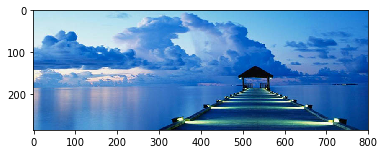

In [2]:
### BEGIN SOLUTION

### END SOLUTION

Store each channel in a separate variable. 

In [3]:
### BEGIN SOLUTION

### END SOLUTION

Display, in grayscale, each channel separately.

Hint: You might want to see the example in RGB_and_Synesthesi.ipynb

#### A. Red channel:

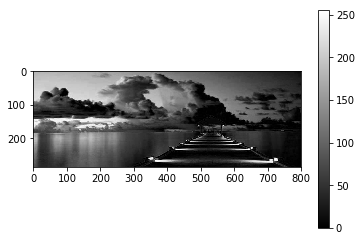

In [4]:
### BEGIN SOLUTION

### END SOLUTION

#### B.Green Channel:

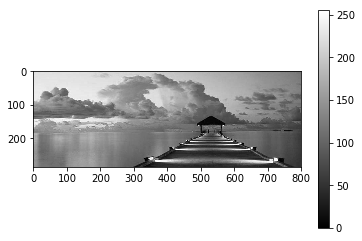

In [5]:
### BEGIN SOLUTION

### END SOLUTION

#### C. Blue channel:

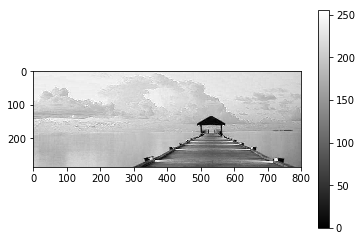

In [6]:
### BEGIN SOLUTION

### END SOLUTION

## Part I: 

Now we would like to display a single channel (for the case of an RGB image, let's say, the R channel) **but in the color of our choice** (it could be red color, but it could be some other color!  Later on when we do this on a hyperspectral image, it'll make sense why!)<br>

For clarity's sake, we'll call the channel that we want to display the **"Extra Channel"**

We're going do this step by step. <br>

First define an rgb vector -- three numbers (r,g,b) that define a point in RGB color-space. This is the color we want to use to display the "Extra Channel"
Call it rgb_vec.

Hint: Remember that the rgb channels in this case have values [0.0,1.0]

In [7]:
### BEGIN SOLUTION

### END SOLUTION
### Print your vector

#### Step 1. 
Now let's create a three matrices - R, G, B - with those values (r, g, b) at **every** pixel. 

In [8]:
# First make a 3-D matrix of zeros the correct shape (same shape as your image)
### BEGIN SOLUTION

### END SOLUTION

# We'll need this in a bit...
single_channel_size = my_img.shape[:2]

# Now substitute each of the three matrices with r*np.ones(single_channel_size) R, G, B 
for i in range(len(rgb_vec)):
    uniform_color[:,:,i] = rgb_vec[i]*np.ones(single_channel_size)

This creates an image of uniform_color of the same size as the image you're working with.

Display this image.

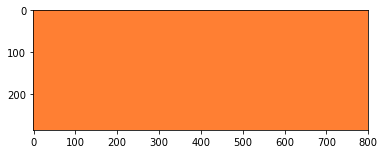

In [9]:
### BEGIN SOLUTION

### END SOLUTION

Now that it works, wrap your code for **Step 1** as a python function called get_uniform_color_img:

In [10]:
def get_uniform_color_img(rgb_vec, image):
    '''This function returns an image with an uniform color of shape of image
    INPUT:
        rgb_vec -> Vector with the color you want to print
        image -> Size of the image you want to get '''
    # First make a 3-D matrix of the correct shape (same shape as your image)
    ### BEGIN SOLUTION

    ### END SOLUTION

    #Now create three equivalent matrices, R, G, B 
    ### BEGIN SOLUTION

    ### END SOLUTION
    
    # return your matrix
    ### BEGIN SOLUTION

    ### END SOLUTION
    

Now check if your function is working.
1. Define another rgb_vector.
2. Use your function to create a matrix of an uniform color of the size of img.shape.
3. Display your result.

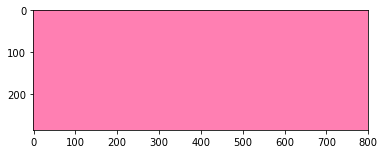

In [11]:
### BEGIN SOLUTION

### END SOLUTION

#### Step 2:
Now, to display the "Extra Channel" in that color, we'll multiply each of uniform_color RGB matrices (element-wise) by the 2-D "Extra Channel" matrix. <br>

For now, you can use the R channel of my_img as the "Extra Channel".

To multiply the matrices element-wise, use the np.multiply(matrix_1, matrix_2) function. 

In [13]:
extra_channel = np.zeros(uniform_color.shape)
for i in range(3):
    extra_channel[:,:,i] = np.multiply(uniform_color[:,:,i], ch_red)
#This normalization is important:
extra_channel = extra_channel / np.float(extra_channel.max())
# Why?

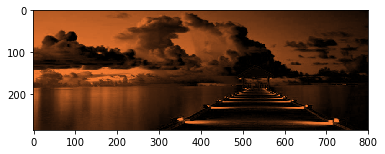

In [14]:
# Print this extra channel
### BEGIN SOLUTION

### END SOLUTION

Now that it works, wrap your code for **Step 2** in a python function called get_extra_channel_color and test it. 

In [15]:
def get_extra_channel_color(uniform_color_img, extra_channel):
    '''This function add an extra channel in uniform_color_image
    INPUTS:
        extra_channel-> And array of the size of pixels with the extra information.
        uniform_color_img -> The original uniform color.
    OUTPUTS:
        extra_channel_color -> An array with the new image, it has the shape of extra_channel'''
    ### Complete the function
    ### BEGIN SOLUION

    ### END SOLUTION
    return extra_channel_color

#### Step 3:
One more thing we'll need is to get the (r,g,b) vector that corresponds to a particular wavelength. Your instructor Mati has written a handy function in the Tools.py module that does this. We're importing here as wl2rgb() for wavelengthToRGB()

Use it to get the RGB vector corresponding to light of 490 nm. <br>

Print the resulting rgb vector:

In [30]:
wavelength = 490
rgb_vec = wl2rgb(wavelength)
print (rgb_vec)

[ 0.  1.  1.]


#### Step 4:

Write in ~5 lines of code the steps necessary to display the "Extra Channel" in an RGB color corresponding to the wavelength of your choice: 

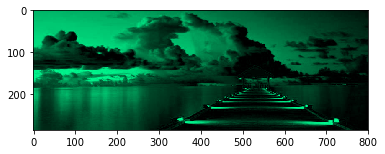

In [17]:
### BEGIN SOLUTION

### END SOLUTION

## Part II: Interpolating between the original RGB image and the extra_channel_color image.

Let's write a function that at a time t (in the range $0 <= t <= 1$) returns: <br>

$$ Image(t) = (RGBImage)\times(1-t) + ExtraChannelColor\times t$$ 

NOTE: You'll need to normalize both the original RGB image and Image(t) by their corresponding maximum pixel values.

In [18]:
def image_interpolation_t(RGBImage, ExtraChannelColor, t):
    '''This function returns the image interpolation for a given time t
    INPUTS:
        RGBImage -> Image of RGB where we area going to add the extra image
        ExtraChannelColor -> Image with an extrachannel.
        t -> a float, time
    OUTPUT:
        image_t -> Image for a given time'''
    ### Complete the function.
    # 1. Normalize the RGB image.
    # 2. Get the Image(t).
    # 3. Normalize your new image called it image_t
    ### BEGIN SOLUTION

    ### END SOLUTION
    return image_t

Test your function at a couple of time-point (e.g. t = 0, 0.5, 1) and display the "frame" at that time point. What do you expect to see if it is working correctly? 

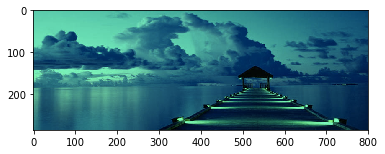

In [19]:
### BEGIN SOLUTION

### END SOLUTION

### Part III: making an animation movie out of the interpolated images.

Now we're going to get the interpolated images (frames) for different values of t. <br>

We'll save each as a separate file. 

And then we'll use a python library to create an animation out of the set of image frames. 

In [20]:
path_to_save = './animations/'
t_vec = np.arange(0,1.1,0.5)
images_all = []

#####  Write a for loop that iterates over the t - values. At each value, create the interpolated image and append it to a list of images. 

In [21]:
### BEGIN SOLUTION

### END SOLUTION

##### Use imageio to save the list of images as a movie in .gif format. 
Hint: Check the documentation of the class get_writer

In [23]:
fps_movie = 40
movie_name = os.path.join(path_to_save, 'animation_test' + str(fps_movie) + '.gif')

### BEGIN SOLUTION

### END SOLUTION


/Users/cody/anaconda/lib/python2.7/site-packages/imageio/core/util.py:78: UserWarning: Lossy conversion from float64 to uint8, range [0, 1]
  dtype_str, out_type.__name__))


##### Put the three steps above in a single python function: 

In [24]:
def make_interpolation_movie(t_vec, RGBImage, ExtraChannelColor, 
                             FPS = 40, movie_name_default = 'animation_test'):
    '''This function returns a movie with 3'''
    ### BEGIN SOLUTION

    ### END SOLUTION

Now we'll test your function

In [25]:
t_vec = np.arange(0,1.1,0.05)
my_fps = 30
make_interpolation_movie( t_vec, my_img, extra_channel_color, FPS = my_fps)

/Users/cody/anaconda/lib/python2.7/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-0.0497949619215, 1.0]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))


#### Putting everything up to now together: 

In [26]:
#Input Parameters 
t_vec = np.arange(0,1.1,0.05)
my_fps = 10
wavelength = 460
extra_channel = ch_blue

#Call the necessary functions: 
rgb_vec = wl2rgb(wavelength)
uniform_color_img = get_uniform_color_img(rgb_vec, my_img)
extra_channel_color = get_extra_channel_color(uniform_color_img, extra_channel)
make_interpolation_movie( t_vec, my_img, extra_channel_color, FPS = my_fps)


/Users/cody/anaconda/lib/python2.7/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [-0.05, 1.0]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))


### Part IV:

Let's make this cyclical! 


In [27]:
from scipy import signal

In [28]:
num_cycles = 5
cycle = signal.triang(20, sym = 0)
t_vec = np.array(num_cycles * list(cycle) )

In [29]:
# Input Parameters 
my_fps = 10
wavelength = 660
extra_channel = ch_red

#Call the necessary functions: 
### BEGIN SOLUTION

### END SOLUTION

Great, we are ready to use your functions in an hyperspectral image!!